# Modelo de regresión lineal 4

In [5]:
# Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from regressors import stats

# Estilos
sns.set(style='whitegrid')

## Preprocesamiento y entrenamiento
* Sin Year, con OneHotEncoding en Country y con las variables de mejor p-value del modelo 1

In [6]:
# Selección de columnas
df = pd.read_csv('../datos/procesados/procesado_life_expectancy.csv')
df = df[['Country', 'Life expectancy', 'Adult Mortality', 'infant deaths', 'percentage expenditure', 'under-five deaths', 'HIV/AIDS']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2912 entries, 0 to 2911
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 2912 non-null   object 
 1   Life expectancy         2912 non-null   float64
 2   Adult Mortality         2912 non-null   float64
 3   infant deaths           2912 non-null   int64  
 4   percentage expenditure  2912 non-null   float64
 5   under-five deaths       2912 non-null   int64  
 6   HIV/AIDS                2912 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 159.4+ KB


In [7]:
# Selección de columnas
columnas_categoricas = df.select_dtypes(include=['object']).columns.tolist() # Tomamos las variables categóricas
columnas_numericas = df.select_dtypes(include=['int64', 'float64']).columns.tolist() # Tomamos las variables numéricas
columnas_numericas = [col for col in columnas_numericas if col != 'Life expectancy'] # Exlcuimos la variable a predecir

In [8]:
# Instanciar el codificador OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Aplicar OneHotEncoding a las columnas categóricas y StandardScaler a las columnas numércias
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', encoder, columnas_categoricas), # columnas categóricas
        ('num', StandardScaler(), columnas_numericas) # columnas numéricas
    ],
    remainder='passthrough'  # Mantener las columnas no incluidas
)

In [10]:
# Transformar los datos
X = preprocessor.fit_transform(df.drop(columns=['Life expectancy']))
y = df['Life expectancy']  # Variable objetivo

In [11]:
# Se dividen los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
# Instanciar modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)

## Métricas

In [13]:
# R² (Coeficiente de Determinación) Entre cero y uno, por encima de 0.7 puede llegar a ser un buen aceptable
r2 = round(r2_score(y_test, y_pred),3)

# Error Cuadrático Medio - Está en unidades cuadradas de la variable objetivo
mse = round(mean_squared_error(y_test, y_pred),3)

# Raiz del MSE (RMSE) - Está en las mismas unidades de la variable objetivo, entre más bajo mejor
rmse = round((mse ** 0.5), 3)

# Error relativo promedio - Menor al 10% Excelente, entre 11% y 20% Bueno, por encima de 30% necesita ajustes
error_relativo = round((rmse / df['Life expectancy'].mean() *100),3)

# Error absoluto medio (MAE) - Debe ser bajo en relación al rango de la variable objetivo
mae = round(mean_absolute_error(y_pred, y_test), 3)

In [17]:
print('r2:', r2) # Por encima del 75 es un buen modelo, por encima de 85 es un excelente modelo, por encima de 90 es un modelo perfecto
print('mse:', mse) # Evalua el modelo entre 3 y -3
print(f"rmse: {rmse} unidades de la variablre objetivo")
print(f'Error relativo promedio: {error_relativo}')
print(f'mae: {mae}')

r2: 0.937
mse: 5.997
rmse: 2.449 unidades de la variablre objetivo
Error relativo promedio: 3.532
mae: 1.693


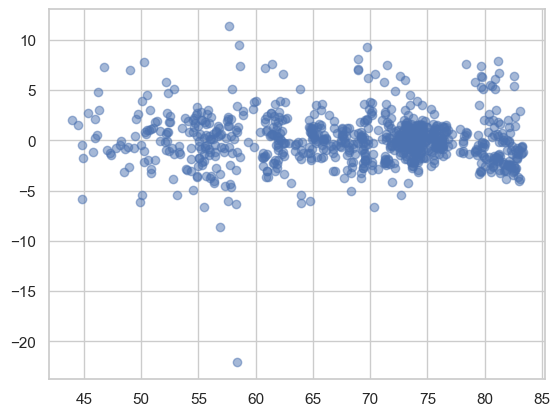

In [15]:
# Gráfico de residuales
residuales = np.subtract(y_test, y_pred.reshape(-1)) # reshape para que quede con las mismas dimensiones
plt.scatter(y_pred, residuales, alpha=0.5)
plt.show()